# Import Library

In [6]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

from skimage import data
from skimage.io import imread
from skimage.color import rgb2gray

# 1. Konversi Gambar

# 1.1. Menampilkan Gambar

In [7]:
img = cv2.imread('otak.jpg')

In [8]:
cv2.imshow('otak', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 1.2. Convert to Grayscale

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [10]:
cv2.imshow('gray', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 1.3. Convert to Binary

In [11]:
(thresh, binary) = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [12]:
cv2.imshow('binary', binary)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Print Pixel

In [13]:
print(gray)

[[ 1  1  1 ...  0  0  0]
 [ 1  1  1 ...  0  0  0]
 [ 1  1  1 ...  0  0  0]
 ...
 [18 18 18 ...  0  0  0]
 [18 18 18 ...  0  0  0]
 [18 18 18 ...  0  0  0]]


In [23]:
print(binary)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#  Histogram

(683, 1024, 3)


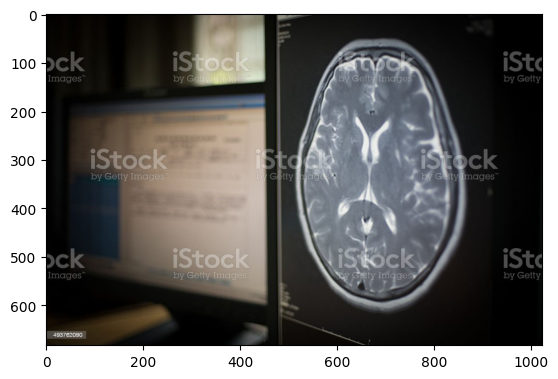

In [15]:
citra1 = imread(fname="otak.jpg")
print(citra1.shape)
plt.imshow(citra1, cmap='gray')

In [16]:
img = cv2.imread('otak.jpg')

In [17]:
cv2.imshow('gambar', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
print(img.shape)

(683, 1024, 3)


In [19]:
[baris, kolom] = img.shape[:2]

# Meningkatkan Kecerahan

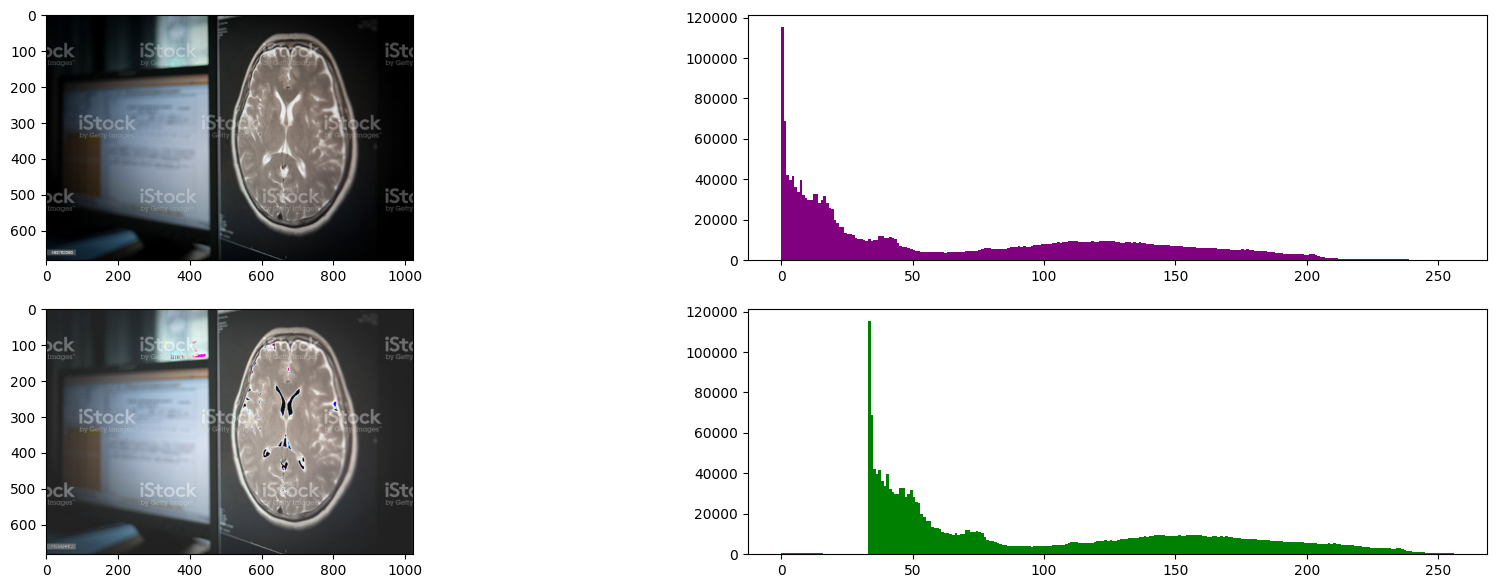

In [20]:
beta = 33
citra_cerah = np.zeros((baris, kolom, 3))

for x in range(baris):
    for y in range (kolom):
        gyx = img[x,y]+beta
        citra_cerah[x,y] = gyx
citra_cerah = citra_cerah.astype(np.uint8)

# sebelum
fig, axs = plt.subplots(2,2, figsize = (21, 7))
axs[0,0].imshow(img)
axs[0,1].hist(img.ravel(), 256, [0,256], color = "purple")

# sesudah
axs[1,0].imshow(citra_cerah)
axs[1,1].hist(citra_cerah.ravel(), 256, [0,256], color = "g")
plt.show()

# Meregangkan Kontras

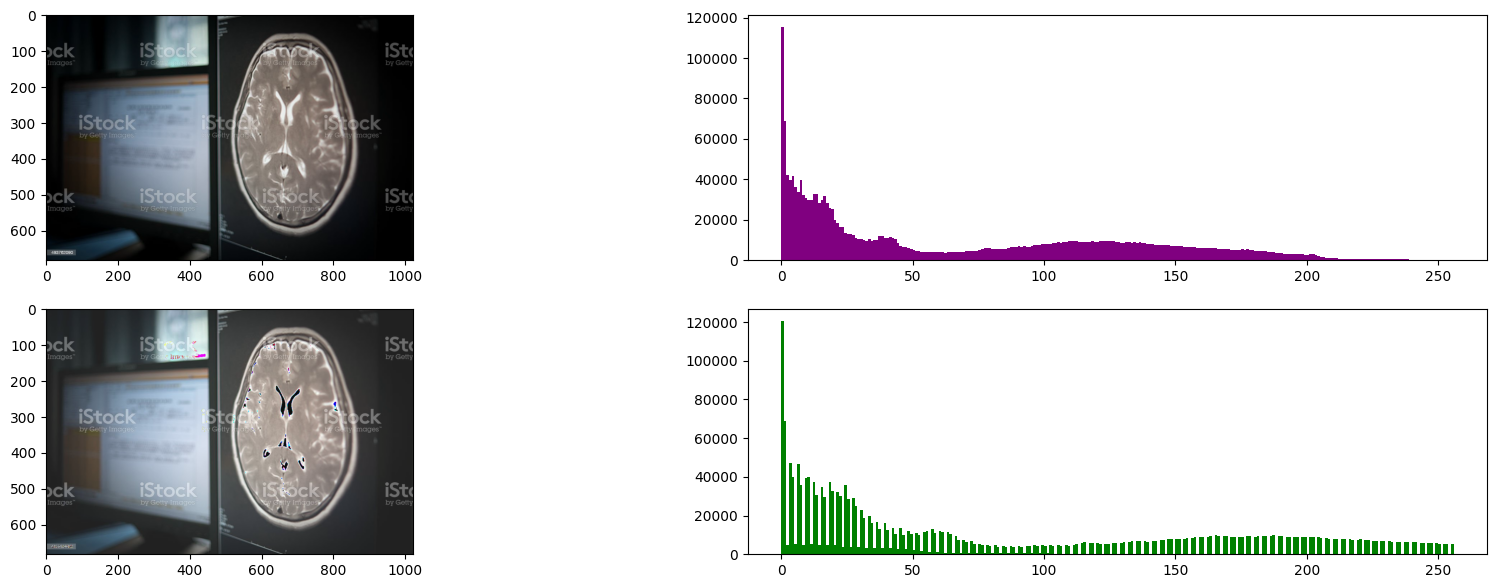

In [21]:
alpa = 1.5
citra_kontras = np.zeros((baris, kolom, 3))

for x in range(baris):
    for y in range (kolom):
        gyx = img[x,y]*alpa
        citra_kontras[x,y] = gyx
citra_kontras = citra_kontras.astype(np.uint8)

# sebelum
fig, axs = plt.subplots(2,2, figsize = (21, 7))
axs[0,0].imshow(img)
axs[0,1].hist(img.ravel(), 256, [0,256], color = "purple")

# sesudah
axs[1,0].imshow(citra_cerah)
axs[1,1].hist(citra_kontras.ravel(), 256, [0,256], color = "g")
plt.show()

# 2.1. Meningkatkan Kecerahan

In [17]:
hist = cv2.calcHist([img], [0], None,[256], [0,256])
hist

array([[4.4322e+04],
       [2.5853e+04],
       [1.7679e+04],
       [1.4928e+04],
       [1.4759e+04],
       [1.3646e+04],
       [1.1685e+04],
       [1.4407e+04],
       [1.1527e+04],
       [1.0484e+04],
       [1.0383e+04],
       [9.8890e+03],
       [1.0429e+04],
       [1.0633e+04],
       [8.6230e+03],
       [8.5110e+03],
       [9.5170e+03],
       [8.0770e+03],
       [6.6390e+03],
       [7.3270e+03],
       [6.1280e+03],
       [6.2390e+03],
       [5.1110e+03],
       [4.9390e+03],
       [4.1930e+03],
       [3.9220e+03],
       [3.6160e+03],
       [3.4820e+03],
       [3.6470e+03],
       [3.6490e+03],
       [3.6580e+03],
       [3.2960e+03],
       [3.1880e+03],
       [3.4980e+03],
       [3.0230e+03],
       [3.6820e+03],
       [3.3950e+03],
       [3.8560e+03],
       [3.7030e+03],
       [3.4930e+03],
       [3.3780e+03],
       [3.6460e+03],
       [3.6530e+03],
       [3.1110e+03],
       [2.4390e+03],
       [2.1300e+03],
       [1.7880e+03],
       [1.779

# Kombinasikan Kecerahan dan Kontras

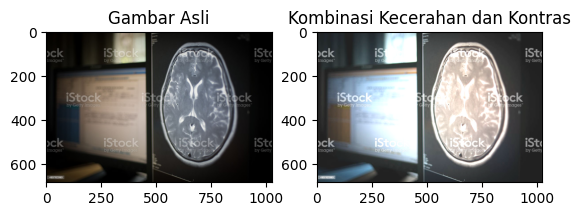

In [25]:
alpha = 1.5
beta = 33
adjusted_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')

plt.subplot(122)
plt.imshow(adjusted_image, cmap='gray')
plt.title('Kombinasi Kecerahan dan Kontras')

plt.show()

# Histogram Abu-abu

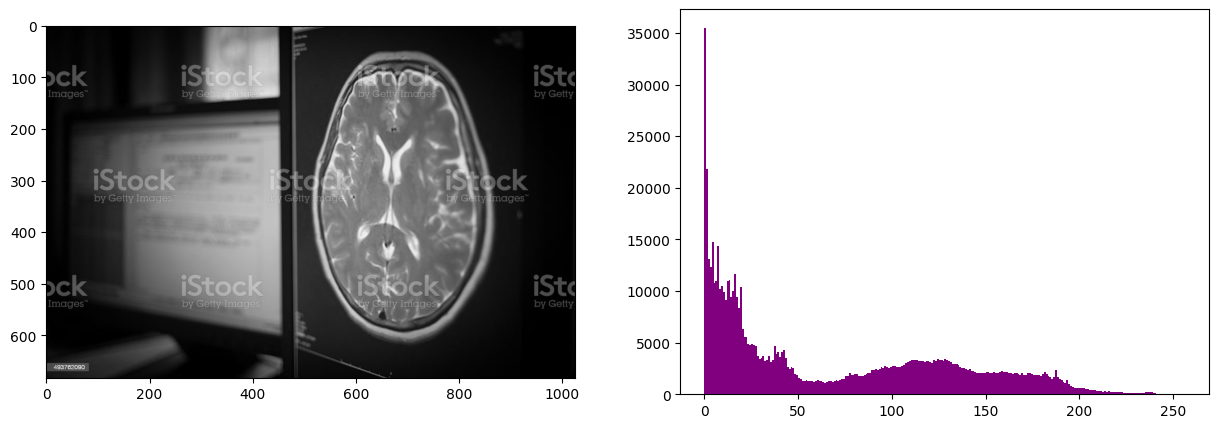

In [26]:
abu = cv2.imread("otak.jpg", 0)
hist2 = cv2.equalizeHist(abu)

fig, axs = plt.subplots(1,2, figsize = (15,5))
axs[0].imshow(cv2.cvtColor(abu,cv2.COLOR_BGR2RGB))
axs[1].hist(abu.ravel(),256,[0,256], color = "purple")
plt.show()